In [41]:
import pandas as pd
import numpy as np
from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
matplotlib.rcParams['axes.unicode_minus'] = False   
OAI = pd.read_csv("Online.csv")
TFI = pd.read_csv("transfer.csv")
CTI = pd.read_csv("Customer.csv")
CTI1 = CTI[CTI["clnt_gender"]!="unknown"]

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
gender_age = CTI1["clnt_gender"] + "_" + CTI1["clnt_age"]
CTI1["gender_age"] = gender_age
merge1 = OAI.merge(CTI1,how = "inner", on="clnt_id")
merge1 = merge1.drop(["trans_id","sech_kwd"],axis=1)
merge2 = TFI.merge(CTI1,how = "inner", on="clnt_id")

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [20]:

merge2['de_dt'] = pd.to_datetime(merge2['de_dt'], format='%Y%m%d')
merge2['day_of_week'] = merge2["de_dt"].dt.weekday
# merge2['day_of_week'] = pd.Categorical(merge2['day_of_week'], ["Sunday", "Monday", "Tuesday","Wednesday","Thursday","Friday","Saturday"])
# merge2.sort('day_of_week')
merge2

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct,clnt_gender,clnt_age,gender_age,day_of_week
0,39423,105124,13,A03,565,2019-09-20,17:26,2990,1,F,50-60,F_50-60,4
1,39423,105124,4,A03,933,2019-09-20,17:26,2990,1,F,50-60,F_50-60,4
2,39423,105124,5,A03,348,2019-09-20,17:26,1990,1,F,50-60,F_50-60,4
3,39423,109361,1,A03,171,2019-09-25,16:35,1200,2,F,50-60,F_50-60,2
4,39423,109361,3,A03,93,2019-09-25,16:35,4000,2,F,50-60,F_50-60,2
5,39423,109361,4,A03,93,2019-09-25,16:35,4000,2,F,50-60,F_50-60,2
6,39423,109361,9,A03,964,2019-09-25,16:35,2990,1,F,50-60,F_50-60,2
7,39423,109361,8,A03,538,2019-09-25,16:35,9900,1,F,50-60,F_50-60,2
8,39423,109361,2,A03,1184,2019-09-25,16:35,2000,2,F,50-60,F_50-60,2
9,39423,105124,9,A03,179,2019-09-20,17:26,9900,1,F,50-60,F_50-60,4


In [30]:
a,b = gender_age.factorize()
val = b.sort_values()
week_cate = ["Sun","Mon","Tue","Wen","Thu","Fri","Sat"]

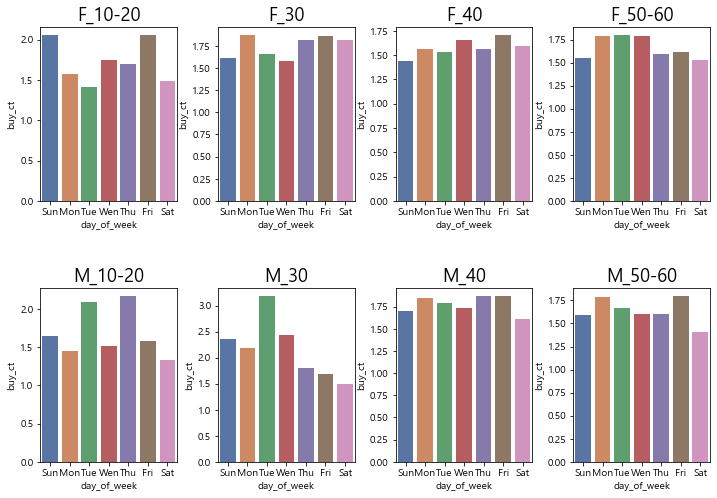

In [48]:
plt.figure(figsize = (12, 8))
for j, i in enumerate(val):
    plt.subplot(241+j)
    data = merge2[merge2["gender_age"]==i]
    tf1 = data.groupby("day_of_week").mean()["buy_ct"].reset_index()
    sns.barplot(data=tf1,x="day_of_week",y="buy_ct",palette="deep")
    plt.title(i,fontsize=18)
    plt.xticks([0,1,2,3,4,5,6],week_cate, fontsize=10)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

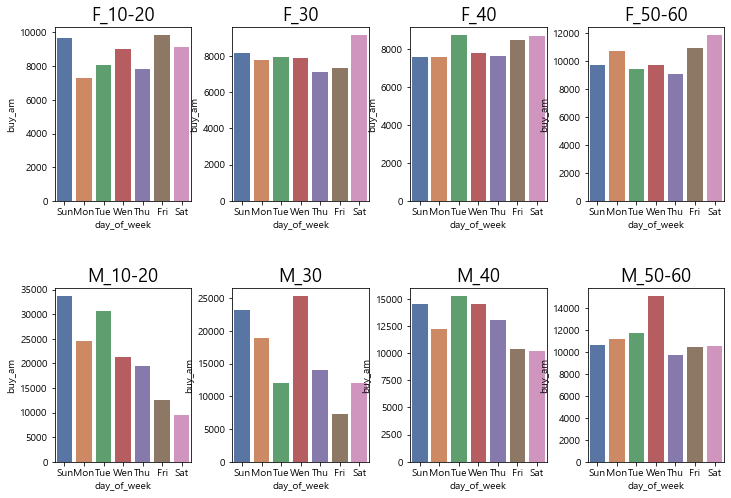

In [49]:
plt.figure(figsize = (12, 8))
for j, i in enumerate(val):
    plt.subplot(241+j)
    data = merge2[merge2["gender_age"]==i]
    tf1 = data.groupby("day_of_week").mean()["buy_am"].reset_index()
    sns.barplot(data=tf1,x="day_of_week",y="buy_am",palette="deep")
    plt.title(i,fontsize=18)
    plt.xticks([0,1,2,3,4,5,6],week_cate, fontsize=10)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

In [ ]:
for j, i in enumerate(val):
    plt.subplot(241+j)
    data = merge1[merge1["gender_age"]==i]
    tf1 = data["tot_sess"]
    sns.barplot(data=tf1,x="day_of_week",y="buy_am",palette="deep")
    plt.title(i,fontsize=18)
    plt.xticks([0,1,2,3,4,5,6],week_cate, fontsize=10)
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)